# Structured Matrix Neural Networks
One can think of neural networks as compositions of affine transforms. Each affine transform takes the form $f(v)=Mv+b$ for some matrix $M$ and vectors $v$ and $b$. The matrices $M$ and the vectors $b$ of all the affine transforms are the weights of our model. The forward pass of a Neural Network spends most of it's time doing the matrix-vector multiplication. In the general case this takes $O(n^2)$ time. 

As explained in [1] there are special cases where this can be done in $O(n \log^k n)$ time for $k=0,1,2$. It is important to note that this is all linear, so we can combine any such matrices and do a transform like

$$(F+H+T)v=Fv+Hv+Tv$$

In $O(3 n\log n)$ time! Say we have matrices $M_1,...,M_k$ we could compute

$$(\sum_{i=1}^k \alpha_i M_i)v$$

In $O(k n\log n)$ time! One can also combine the matrices as 

$$
\begin{pmatrix}
M_{11} & M_{12} \\
M_{21} & M_{22} 
\end{pmatrix}
\begin{pmatrix}
x\\
y\end{pmatrix}=
\begin{pmatrix}
M_{11}x+M_{12}y\\
M_{21}x+M_{22}y
\end{pmatrix}
$$

In $O(n\log n)$ time assuming! Consider now any matrices $M_1,...,M_k$ constructed by composing matrices as above; for any matrix $M\in \text{span}(M_1,...,M_k)$ we can do matrix-vector multiplication in $O(kn\log n)$ time. 

By replacing arbitrary matrices of neural networks with such structured matrices, the hope are able to sufficiently approximate the original network, while getting a significant speedup. 

<b>Lemma 1:</b>Structured Matrices Neural Networks are universal function approximations. <br>
<i>Proof</i>:
This is just initial ideas, I haven't really thought about the proof yet. In Quantum Computing one have a model of computation where bits a complex vectors and transitions are unitary matrices. An initial result shows that by combining Hadamard (Fourier matrix for $n=2$) and CNOT one can approximate any unitary matrix to arbitrary precision. The CNOT is the identity with two entries switched, thus, doing matrix-vector multipllication with CNOT takes $O(n)$ time; thus, for any unitary matrix and constant $\epsilon>0$ we can approximate the matrix to precision $\epsilon$ by a combination of $H$ and $CNOT$. 

In other words, if we let SMNN be neural networks where all matrices where matrix-vector mult takes $O(n\log n)$ we can do all unitary matrices. 

Are unitary weight matrix + non linearity enough to be universal function approximator?


[1] http://www.netlib.org/utk/people/JackDongarra/etemplates/node384.html



.. I just got my proof for Fourier matrix to work, but it has been proved for SM in september like 2 months ago. I am not sure why they didn't have any experiments, it seems they could get crazy speed ups! Or at least a lot more weights! 

wait, i think i read an article on hoeblitz/toeblitz that had some problems with constants where they needed to go to n>8000 before they got any speedups. This might be the problem, but then why didn't they use FFT???

Just make the network have one neuron for each FFT matrix, you are allowed to have n/log(n) of them and the evaluationg will take the same time up to constant, and you will have approximately as many "adjustible" weights. 

## Cute warmup exercise
Try to do multiclass linear regression but where the weight matrix is fourier transform?

# Simple Fourier Example



In [10]:
%matplotlib notebook
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def fourier_matrix(N):
    # Make 
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    
    # N'th root of unity
    omega = np.exp( - 2 * np.pi * 1J / N )
    
    # N'th fourier matrix
    F_N = np.power( omega, i * j ) / np.sqrt(N)
                   
    return F_N

n = 2**8
v = np.ones(n)
a = fft(v) / np.sqrt(n)
b = fourier_matrix(n) @ v
np.allclose(a, b)
import time


print("Generating fourier matrix and random vector... ", end='')
f = fourier_matrix(2**12)
v = np.random.rand(2**12)
print("DONE!")

t0 = time.time()
for i in range(1000): fft(v)
print("Fast Fourier Transform: ", time.time()-t0)

t0 = time.time()
for i in range(1000): f @ v
print("Naive Matrix Multiplication: ", time.time() - t0)




Generating fourier matrix and random vector... DONE!
Fast Fourier Transform:  0.04661083221435547
Naive Matrix Multiplication:  11.027009963989258


Make normal neural network on mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


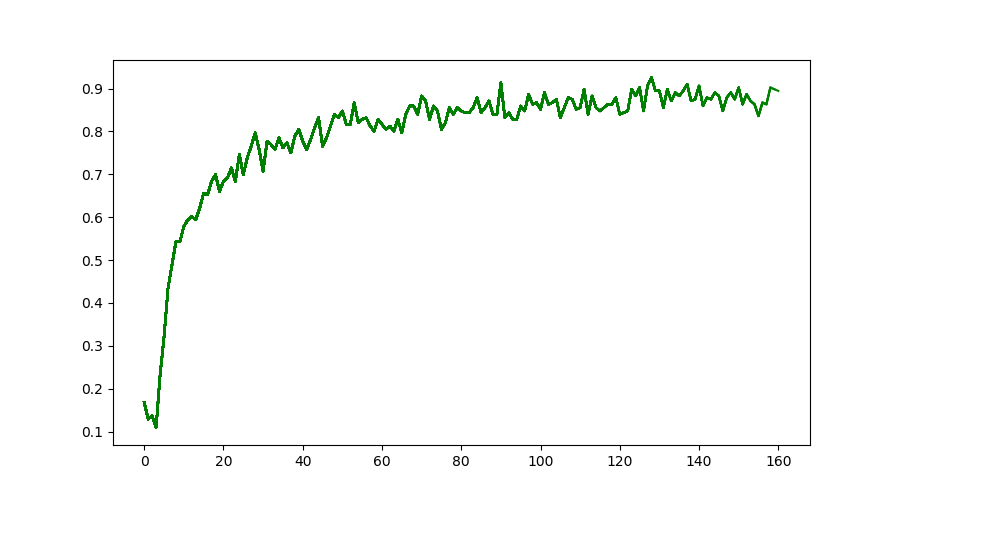

0 0.167969
1 0.128906
2 0.136719
3 0.109375
4 0.230469
5 0.320312
6 0.433594
7 0.488281
8 0.542969
9 0.542969
10 0.578125
11 0.59375
12 0.601562
13 0.59375
14 0.621094
15 0.65625
16 0.652344
17 0.683594
18 0.699219
19 0.660156
20 0.683594
21 0.691406
22 0.714844
23 0.683594
24 0.746094
25 0.699219
26 0.738281
27 0.765625
28 0.796875
29 0.757812
30 0.707031
31 0.777344
32 0.769531
33 0.757812
34 0.785156
35 0.761719
36 0.773438
37 0.75
38 0.789062
39 0.804688
40 0.777344
41 0.757812
42 0.78125
43 0.808594
44 0.832031
45 0.765625
46 0.785156
47 0.8125
48 0.839844
49 0.832031
50 0.847656
51 0.816406
52 0.816406
53 0.867188
54 0.820312
55 0.828125
56 0.832031
57 0.8125
58 0.800781
59 0.828125
60 0.816406
61 0.804688
62 0.8125
63 0.800781
64 0.828125
65 0.796875
66 0.839844
67 0.859375
68 0.859375
69 0.839844
70 0.882812
71 0.871094
72 0.828125
73 0.859375
74 0.847656
75 0.804688
76 0.820312
77 0.855469
78 0.839844
79 0.855469
80 0.847656
81 0.84375
82 0.84375
83 0.855469
84 0.878906
85 0.8

KeyboardInterrupt: 

In [58]:
%matplotlib notebook

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

batch_size = 256

init = tf.contrib.layers.xavier_initializer()

X = mnist.train.images[:,0:512] 
n, d = X.shape

y = mnist.train.labels

X_ = tf.placeholder("float", shape=[None, 512])
y_ = tf.placeholder("float", shape=[None, 10])

w1 = tf.Variable(init([512, 512]))
b1 = tf.Variable(init([512]))
w2 = tf.Variable(init([512, 512]))
b2 = tf.Variable(init([512]))
w3 = tf.Variable(init([512, 10]))
b3 = tf.Variable(init([10]))

layer1 = tf.nn.relu(tf.matmul(X_, w1)+b1)
layer2 = tf.nn.relu(tf.matmul(layer1, w2)+b2)
layer3 = tf.matmul(layer2, w3)+b3

loss = tf.reduce_mean((layer3-y_)**2)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# evaluate
correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


fig, ax_error = plt.subplots(1, 1, figsize=(9, 5))


sess = tf.Session()

sess.run(tf.global_variables_initializer())

accs = []
xs = []

for i in range(1000):
    
    batch_indices = np.random.choice(n, size=batch_size, replace=False)
    batch_X = X[batch_indices]
    batch_y = y[batch_indices]
    
    cost, _ = sess.run([loss, train_step], feed_dict={X_: batch_X, y_: batch_y})
    
    acc = sess.run(accuracy, feed_dict={X_: batch_X, y_: batch_y})
    xs.append(i)
    accs.append(acc)
    
    ax_error.plot(xs, accs, '-g')
    fig.canvas.draw()
    
    
    print(i, acc)




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


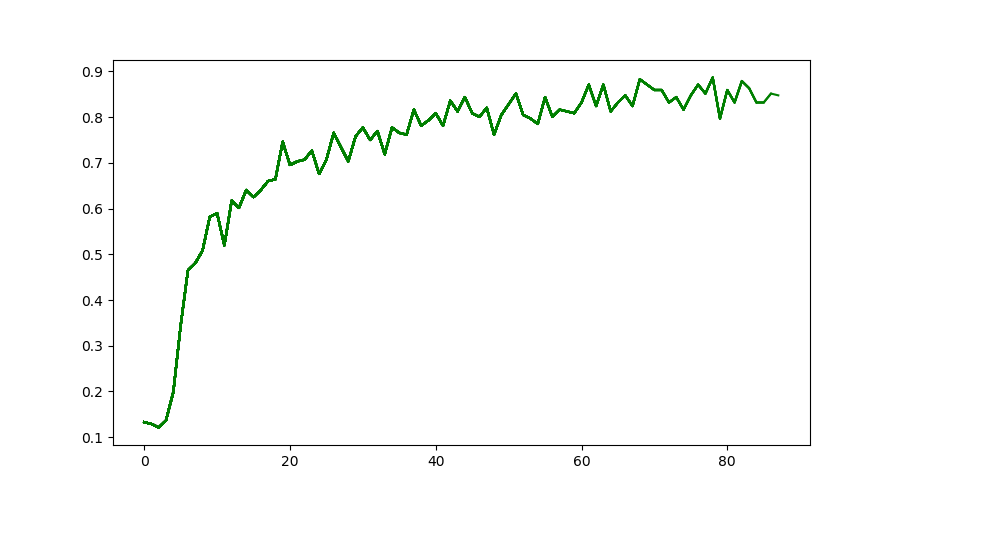

0 0.132812
1 0.128906
2 0.121094
3 0.136719
4 0.199219
5 0.34375
6 0.464844
7 0.480469
8 0.507812
9 0.582031
10 0.589844
11 0.519531
12 0.617188
13 0.601562
14 0.640625
15 0.625
16 0.640625
17 0.660156
18 0.664062
19 0.746094
20 0.695312
21 0.703125
22 0.707031
23 0.726562
24 0.675781
25 0.707031
26 0.765625
27 0.734375
28 0.703125
29 0.757812
30 0.777344
31 0.75
32 0.769531
33 0.71875
34 0.777344
35 0.765625
36 0.761719
37 0.816406
38 0.78125
39 0.792969
40 0.808594
41 0.78125
42 0.835938
43 0.8125
44 0.84375
45 0.808594
46 0.800781
47 0.820312
48 0.761719
49 0.804688
50 0.828125
51 0.851562
52 0.804688
53 0.796875
54 0.785156
55 0.84375
56 0.800781
57 0.816406
58 0.8125
59 0.808594
60 0.832031
61 0.871094
62 0.824219
63 0.871094
64 0.8125
65 0.832031
66 0.847656
67 0.824219
68 0.882812
69 0.871094
70 0.859375
71 0.859375
72 0.832031
73 0.84375
74 0.816406
75 0.847656
76 0.871094
77 0.851562
78 0.886719
79 0.796875
80 0.859375
81 0.832031
82 0.878906
83 0.863281
84 0.832031
85 0.83203

KeyboardInterrupt: 

In [71]:
%matplotlib notebook

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

batch_size = 256

init = tf.contrib.layers.xavier_initializer()

X = mnist.train.images[:,0:512] 
n, d = X.shape

y = mnist.train.labels

X_ = tf.placeholder("float", shape=[None, 512])
y_ = tf.placeholder("float", shape=[None, 10])

Fn = fourier_matrix(512)
Fn = np.array(np.abs(Fn), dtype=np.float32)

w1 = tf.Variable(init([512, 512]))
b1 = tf.Variable(init([512]))
w2 = tf.Variable(init([512, 512]))
b2 = tf.Variable(init([512]))
w3 = tf.Variable(init([512, 10]))
b3 = tf.Variable(init([10]))

#layer1 = tf.nn.relu(tf.matmul(X_, w1)+b1)
#layer2 = tf.nn.relu(tf.matmul(layer1, w2)+b2)
#layer3 = tf.matmul(layer2, w3)+b3

Fn = tf.constant(Fn)

layer1 = tf.nn.relu(tf.matmul(X_, Fn)+b1)
layer2 = tf.nn.relu(tf.matmul(layer1, w2)+b2)
layer3 = tf.matmul(layer2, w3)+b3

loss = tf.reduce_mean((layer3-y_)**2)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# evaluate
correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


fig, ax_error = plt.subplots(1, 1, figsize=(9, 5))


sess = tf.Session()

sess.run(tf.global_variables_initializer())

accs = []
xs = []

for i in range(1000):
    
    batch_indices = np.random.choice(n, size=batch_size, replace=False)
    batch_X = X[batch_indices]
    batch_y = y[batch_indices]
    
    cost, _ = sess.run([loss, train_step], feed_dict={X_: batch_X, y_: batch_y})
    
    acc = sess.run(accuracy, feed_dict={X_: batch_X, y_: batch_y})
    xs.append(i)
    accs.append(acc)
    
    ax_error.plot(xs, accs, '-g')
    fig.canvas.draw()
    
    
    print(i, acc)


